## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZES = [2, 16, 32, 128, 256]
MOMENTUM = 0.95

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for BATCH_SIZE in BATCH_SIZES:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print('BATCH SIZE:', BATCH_SIZE)
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    results['bat'+str(BATCH_SIZE)] = {'train-loss': train_loss,
                                     'valid-loss': valid_loss,
                                     'train-acc': train_acc,
                                     'valid-acc': valid_acc}

W0425 16:12:48.603196  7100 deprecation_wrapper.py:119] From D:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0425 16:12:48.604197  7100 deprecation_wrapper.py:119] From D:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0425 16:12:48.616199  7100 deprecation_wrapper.py:119] From D:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0425 16:12:48.617227  7100 deprecation_wrapper.py:119] From D:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0425 16:12:48.619197  7100 deprecation_wrapper.py:119] From D:\Anaconda3\li

BATCH SIZE: 2


W0425 16:12:48.858196  7100 deprecation_wrapper.py:119] From D:\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0425 16:12:48.938231  7100 deprecation.py:323] From D:\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512       
__________

50000/50000 [==============================] - 156s 3ms/step - loss: 2.2567 - acc: 0.1467 - val_loss: 3.4265 - val_acc: 0.1954
Epoch 50/50
50000/50000 [==============================] - 158s 3ms/step - loss: 2.2535 - acc: 0.1508 - val_loss: 2.9852 - val_acc: 0.1829
BATCH SIZE: 16
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024

50000/50000 [==============================] - 21s 410us/step - loss: 1.1101 - acc: 0.6074 - val_loss: 1.3633 - val_acc: 0.5293
Epoch 48/50
50000/50000 [==============================] - 20s 408us/step - loss: 1.1018 - acc: 0.6105 - val_loss: 1.3321 - val_acc: 0.5416
Epoch 49/50
50000/50000 [==============================] - 20s 405us/step - loss: 1.0960 - acc: 0.6117 - val_loss: 1.3465 - val_acc: 0.5274
Epoch 50/50
50000/50000 [==============================] - 20s 407us/step - loss: 1.0939 - acc: 0.6135 - val_loss: 1.3573 - val_acc: 0.5246
BATCH SIZE: 32
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512) 

50000/50000 [==============================] - 10s 196us/step - loss: 0.8287 - acc: 0.7027 - val_loss: 1.5230 - val_acc: 0.5095
Epoch 46/50
50000/50000 [==============================] - 10s 203us/step - loss: 0.8125 - acc: 0.7093 - val_loss: 1.5411 - val_acc: 0.5142
Epoch 47/50
50000/50000 [==============================] - 10s 201us/step - loss: 0.8041 - acc: 0.7139 - val_loss: 1.6575 - val_acc: 0.4926
Epoch 48/50
50000/50000 [==============================] - 10s 201us/step - loss: 0.8053 - acc: 0.7115 - val_loss: 1.5389 - val_acc: 0.5177
Epoch 49/50
50000/50000 [==============================] - 10s 199us/step - loss: 0.7912 - acc: 0.7167 - val_loss: 1.5501 - val_acc: 0.5130
Epoch 50/50
50000/50000 [==============================] - 10s 201us/step - loss: 0.7840 - acc: 0.7193 - val_loss: 1.6257 - val_acc: 0.5035
BATCH SIZE: 128
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)    

Epoch 44/50
50000/50000 [==============================] - 4s 73us/step - loss: 0.3238 - acc: 0.8888 - val_loss: 2.3175 - val_acc: 0.4521
Epoch 45/50
50000/50000 [==============================] - 4s 74us/step - loss: 0.3168 - acc: 0.8920 - val_loss: 2.2681 - val_acc: 0.4687
Epoch 46/50
50000/50000 [==============================] - 4s 74us/step - loss: 0.3041 - acc: 0.8970 - val_loss: 2.3449 - val_acc: 0.4717
Epoch 47/50
50000/50000 [==============================] - 4s 76us/step - loss: 0.3006 - acc: 0.8962 - val_loss: 2.5125 - val_acc: 0.4585
Epoch 48/50
50000/50000 [==============================] - 4s 74us/step - loss: 0.2833 - acc: 0.9038 - val_loss: 2.4296 - val_acc: 0.4597
Epoch 49/50
50000/50000 [==============================] - 4s 74us/step - loss: 0.2776 - acc: 0.9053 - val_loss: 2.3805 - val_acc: 0.4605
Epoch 50/50
50000/50000 [==============================] - 4s 73us/step - loss: 0.2723 - acc: 0.9075 - val_loss: 2.6437 - val_acc: 0.4478
BATCH SIZE: 256
__________________

Epoch 43/50
50000/50000 [==============================] - 3s 50us/step - loss: 0.2453 - acc: 0.9271 - val_loss: 2.3876 - val_acc: 0.4582
Epoch 44/50
50000/50000 [==============================] - 3s 51us/step - loss: 0.2340 - acc: 0.9319 - val_loss: 2.2762 - val_acc: 0.4613
Epoch 45/50
50000/50000 [==============================] - 3s 50us/step - loss: 0.2245 - acc: 0.9360 - val_loss: 2.2843 - val_acc: 0.4647
Epoch 46/50
50000/50000 [==============================] - 2s 50us/step - loss: 0.2079 - acc: 0.9409 - val_loss: 2.3225 - val_acc: 0.4703
Epoch 47/50
50000/50000 [==============================] - 3s 51us/step - loss: 0.1979 - acc: 0.9448 - val_loss: 2.5116 - val_acc: 0.4665
Epoch 48/50
50000/50000 [==============================] - 3s 50us/step - loss: 0.1890 - acc: 0.9475 - val_loss: 2.3904 - val_acc: 0.4733
Epoch 49/50
50000/50000 [==============================] - 3s 50us/step - loss: 0.1818 - acc: 0.9494 - val_loss: 2.4748 - val_acc: 0.4705
Epoch 50/50
50000/50000 [=========

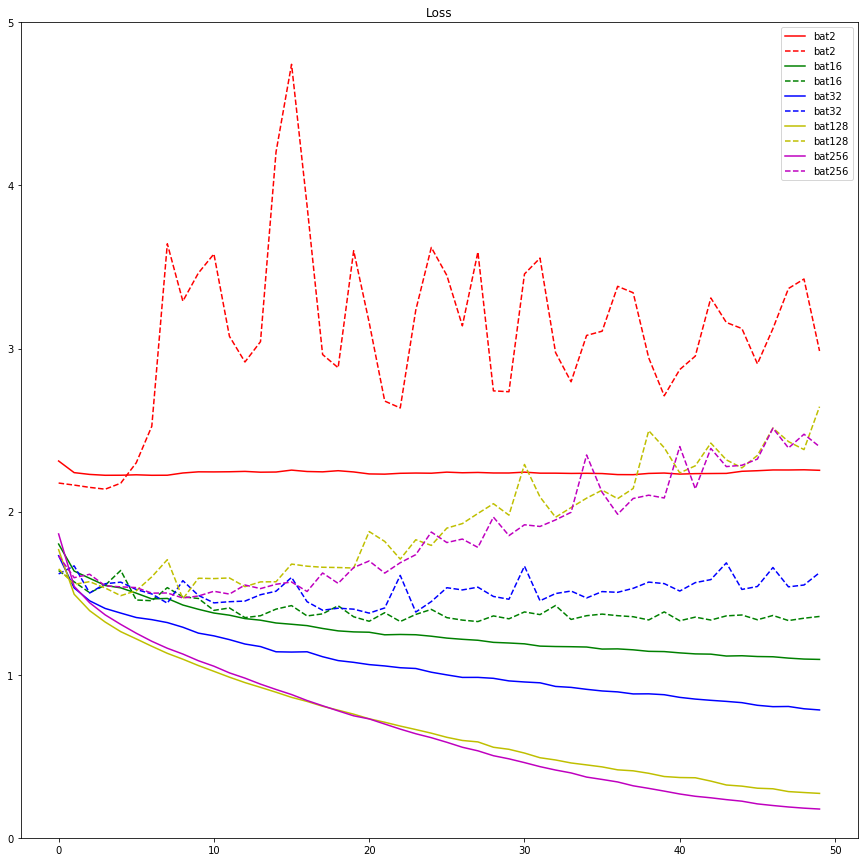

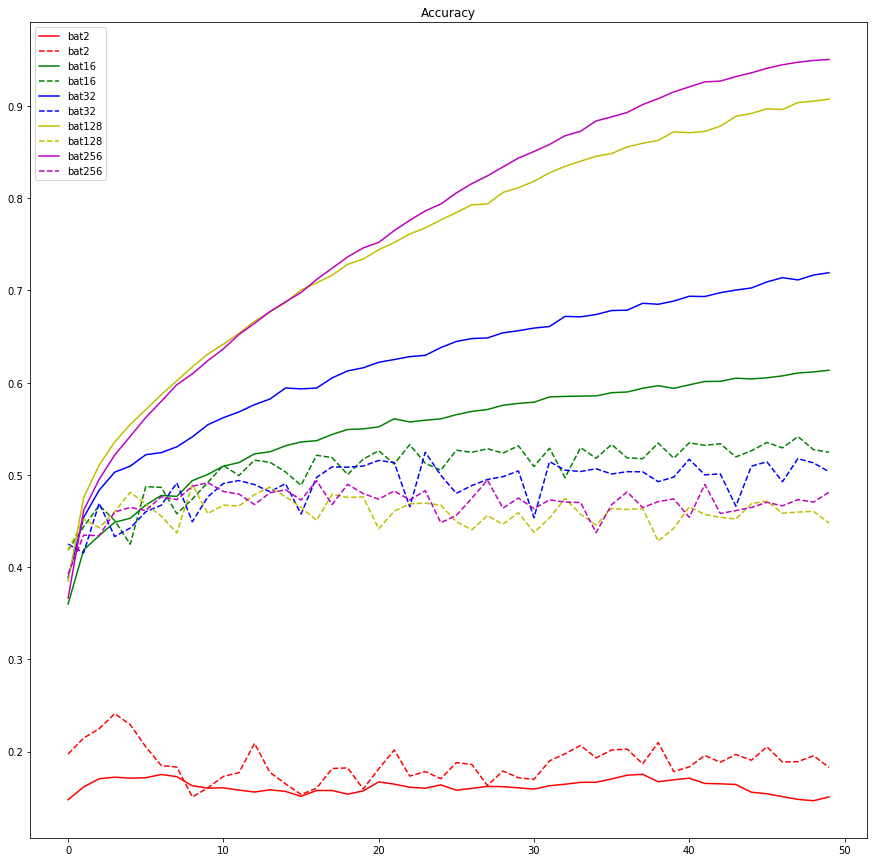

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k", "c", "w"]

plt.figure(figsize=(15,15))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(15,15))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()